In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('gppd_120_pr.csv')
df.head()

,system:index,capacity_mw,commissioning_year,country,country_long,estimated_generation_gwh,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,...,other_fuel1,other_fuel2,other_fuel3,owner,primary_fuel,source,url,wepp_id,year_of_capacity_data,.geo
0,0000000000000000315a,15.0,1942.0,USA,United States of America,685.397712,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,PREPA,Hydro,CEPR,http://energia.pr.gov/datos/plantas/,30936.0,0,"{""type"":""Point"",""coordinates"":[-66.66629863706..."
1,000000000000000026e5,1492.0,1975.0,USA,United States of America,8334.010812,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,PREPA,Oil,PREPA,http://www.prepa.com/aguirre.asp,30928.0,0,"{""type"":""Point"",""coordinates"":[-66.23079607357..."
2,00000000000000002fda,990.0,1962.0,USA,United States of America,5529.940150,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,PREPA,Oil,PREPA,http://www.prepa.com/costasur.asp,30934.0,0,"{""type"":""Point"",""coordinates"":[-66.75340271704..."
3,00000000000000003f76,602.0,1960.0,USA,United States of America,3362.650475,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,PREPA,Oil,PREPA,http://www.prepa.com/PALOSECO.ASP,30942.0,0,"{""type"":""Point"",""coordinates"":[-66.14859700475..."
4,00000000000000002def,10.0,1915.0,USA,United States of America,456.931808,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,PREPA,Hydro,PREPA,http://www.prepa.com/historia_eng.asp https:/...,65289.0,0,"{""type"":""Point"",""coordinates"":[-66.10600367149..."


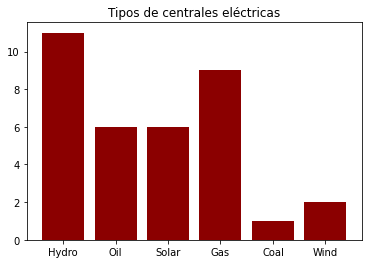

In [3]:
 
plt.hist(df['primary_fuel'],bins=[x for i in range(6) for x in (i-0.4,i+0.4)], density = False, 
         histtype ='bar',
         color = 'darkred')
  
plt.title("Tipos de centrales eléctricas")

plt.show()

In [4]:
años=df[df['commissioning_year']!=0]['commissioning_year'].unique()
años

array([1942., 1975., 1962., 1960., 1915., 1929., 1941., 1937., 2009.,
       2011., 2012., 2015.])

In [5]:
for i in range(len(años)):
  print(2022-años[i])

80.0
47.0
60.0
62.0
107.0
93.0
81.0
85.0
13.0
11.0
10.0
7.0


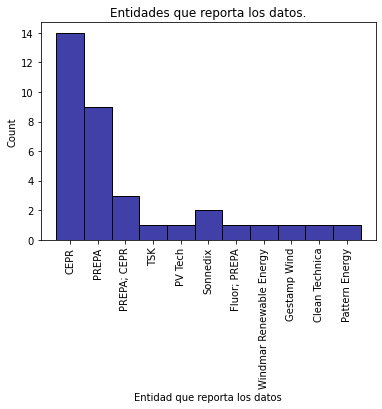

In [6]:
sns.histplot(df['source'],color='darkblue')
plt.title("Entidades que reporta los datos.")
plt.xlabel("Entidad que reporta los datos")
plt.xticks(rotation=90)
plt.show()

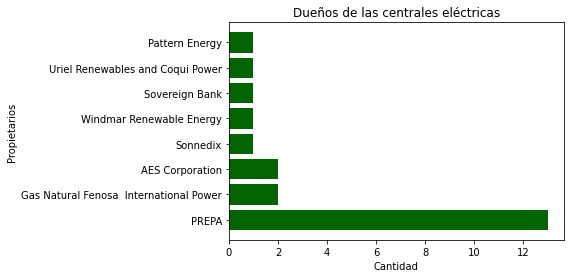

In [7]:
x=df['owner'].dropna().unique()

y=df['owner'].dropna().value_counts()

plt.barh(x, y, color ='darkgreen')
 
plt.xlabel("Cantidad")
plt.ylabel("Propietarios")
plt.title("Dueños de las centrales eléctricas")
plt.show()

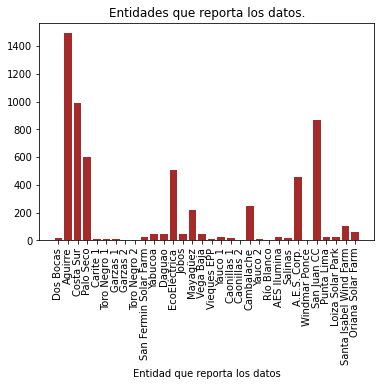

In [8]:
plt.bar(df['name'],df['capacity_mw'],color='brown')
plt.title("Entidades que reporta los datos.")
plt.xlabel("Entidad que reporta los datos")
plt.xticks(rotation=90)
plt.show()

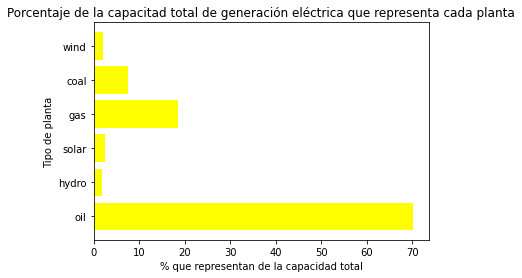

In [9]:
oil=df[df['primary_fuel']=='Oil']['capacity_mw']
oil=oil.sum()

hydro=df[df['primary_fuel']=='Hydro']['capacity_mw']
hydro=hydro.sum()

solar=df[df['primary_fuel']=='Solar']['capacity_mw']
solar=solar.sum()

gas=df[df['primary_fuel']=='Gas']['capacity_mw']
gas=gas.sum()

coal=df[df['primary_fuel']=='Coal']['capacity_mw']
coal=coal.sum()

wind=df[df['primary_fuel']=='Wind']['capacity_mw']
wind=wind.sum()

total=oil+hydro+gas+coal+wind
total


oil=(oil/total)*100
hydro=(hydro/total)*100
solar=(solar/total)*100
gas=(gas/total)*100
coal=(coal/total)*100
wind=(wind/total)*100
nombres=['oil','hydro','solar', 'gas', 'coal', 'wind']
valores=[oil,hydro,solar, gas, coal, wind]

plt.barh(nombres, valores, color ='yellow')
 
plt.ylabel("Tipo de planta")
plt.xlabel("% que representan de la capacidad total")
plt.title('Porcentaje de la capacitad total de generación eléctrica que representa cada planta')
plt.show()

In [10]:
print(f"La generación estimada es {sum(df['estimated_generation_gwh'])} GW/h")

La generación estimada es 486860.87514460966 GW/h


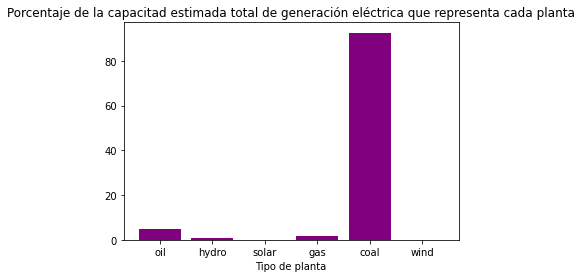

In [11]:
oil=df[df['primary_fuel']=='Oil']['estimated_generation_gwh']
oil=oil.sum()

hydro=df[df['primary_fuel']=='Hydro']['estimated_generation_gwh']
hydro=hydro.sum()

solar=df[df['primary_fuel']=='Solar']['estimated_generation_gwh']
solar=solar.sum()

gas=df[df['primary_fuel']=='Gas']['estimated_generation_gwh']
gas=gas.sum()

coal=df[df['primary_fuel']=='Coal']['estimated_generation_gwh']
coal=coal.sum()

wind=df[df['primary_fuel']=='Wind']['estimated_generation_gwh']
wind=wind.sum()

total=oil+hydro+gas+coal+wind
total


oil=(oil/total)*100
hydro=(hydro/total)*100
solar=(solar/total)*100
gas=(gas/total)*100
coal=(coal/total)*100
wind=(wind/total)*100
nombres=['oil','hydro','solar', 'gas', 'coal', 'wind']
valores=[oil,hydro,solar, gas, coal, wind]
plt.bar(nombres, valores, color ='purple')
 
plt.xlabel("Tipo de planta")

plt.title('Porcentaje de la capacitad estimada total de generación eléctrica que representa cada planta')
plt.show()

In [12]:
import folium

In [13]:
#Extraemos del primer dataset las coordenadas de las plantas en Pto Rico
CE=[[-66.6662986370627,18.33589933648736],[-66.23079607357684,17.951899390168816],[-66.75340271704073,18.000298473002918],[-66.14859700475763,18.455300685395482],
       [-66.10600367149512,18.044702201293134],[-66.48789892211643,18.13180182217009],[-66.73459422879728,18.094100122763205],[-66.7305007740302,18.07270089680772],[-66.51159458511445,18.166399987243775],
       [-65.90769852944625,18.405501444830595],[-66.2312018517727,17.953299547899597],[-65.82489748198483,18.106398323468607],[-66.75370147681129,18.001801190057932],[-65.6677007925477,18.232501701260055],
       [-66.75520419386629,17.981200143191007],[-66.14019605837294,17.961499834736884],[-67.16000584659918,18.21940086236503],[-66.14980096204206,18.455100025848076],[-66.39140397531986,18.44580280015164],[-65.44400106999949,18.142900524692116],
       [-66.8711006893464,18.110598796660952],[-66.6432049527069,18.296101859585352],[-66.66909895252427,18.239698690360314],[-66.69679888826826,18.46910160315589],
       [-66.8836976498224,18.05359810789475],[-65.78520256440704,18.24360040378208],[-66.15910264683956,17.94679817856367],[-66.2204955501434,17.978600487276847],
       [-66.14939964294724,17.947400157205887],[-66.54849810543277,18.062297814050027],[-66.1045009544401,18.426998771009263],[-65.69480320875054,18.186800374563294],[-65.90280243648958,18.41339851279625],[-66.39800344487897,17.98529805705913],[-67.0442966333633,18.47290075725343]]


In [14]:
m = folium.Map()
for i in range(len(CE)):
    folium.Marker([CE[i][1],CE[i][0]], popup="<i>Mt. Hood Meadows</i>").add_to(m)

m

In [42]:
datos = pd.read_csv('/content/global_power_plant_database.csv')
datos.head()

ParserError: ignored

In [41]:
dM= datos[datos['country_long']=='Mexico']
dM=dM.reset_index()
dM
dM=dM.drop(columns=['index'])
dM.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017


In [35]:
ubM=[]
for i in range(len(dM)):
    ubM.append([dM['longitude'][i],dM['latitude'][i]])


In [36]:
m = folium.Map()
for i in range(len(ubM)):
    folium.Marker([ubM[i][1],ubM[i][0]], popup="<i>Mt. Hood Meadows</i>").add_to(m)

m

In [43]:
dZ= datos[datos['country_long']=='Afghanistan']
dZ=dZ.reset_index()
dZ
dZ=dZ.drop(columns=['index'])

In [38]:
ubZ=[]
for i in range(len(dZ)):
    ubZ.append([dZ['longitude'][i],dZ['latitude'][i]])

In [39]:
m = folium.Map()
for i in range(len(ubZ)):
    folium.Marker([ubZ[i][1],ubZ[i][0]], popup="<i>Mt. Hood Meadows</i>").add_to(m)

m